In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
data = pd.read_csv("Billionaire.csv")
data.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology
8,Sergey Brin,$89 B,United States,Google,9,47.0,Technology
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified


قبل ازاینکه کار را شروع کنیم ببینیم آیا مقادیر خالی یا نال داریم یا نه؟
_ preprocessing:

In [15]:
data.isnull().sum() #مقادیر نال را جمع بزن و نمایش بده

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

این 79 نفر را که سن شون نال هست را حذف میکنیم

In [16]:
data = data.dropna()  #‌مقادیر نال را حذف کن و دوباره بریز داخل خود متغییر دیتا

In [17]:
data.isnull().sum()  

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

Delete $ and B from Networth column :

In [18]:
data["NetWorth"] = data["NetWorth"].str.strip("$")
data["NetWorth"] = data["NetWorth"].str.strip("B")
data["NetWorth"] = data["NetWorth"].astype(float)
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


Processing :

In [19]:
df = data.sort_values(by= ["NetWorth"], ascending=False).head(10).reset_index()  # مرتب کردن نزولی

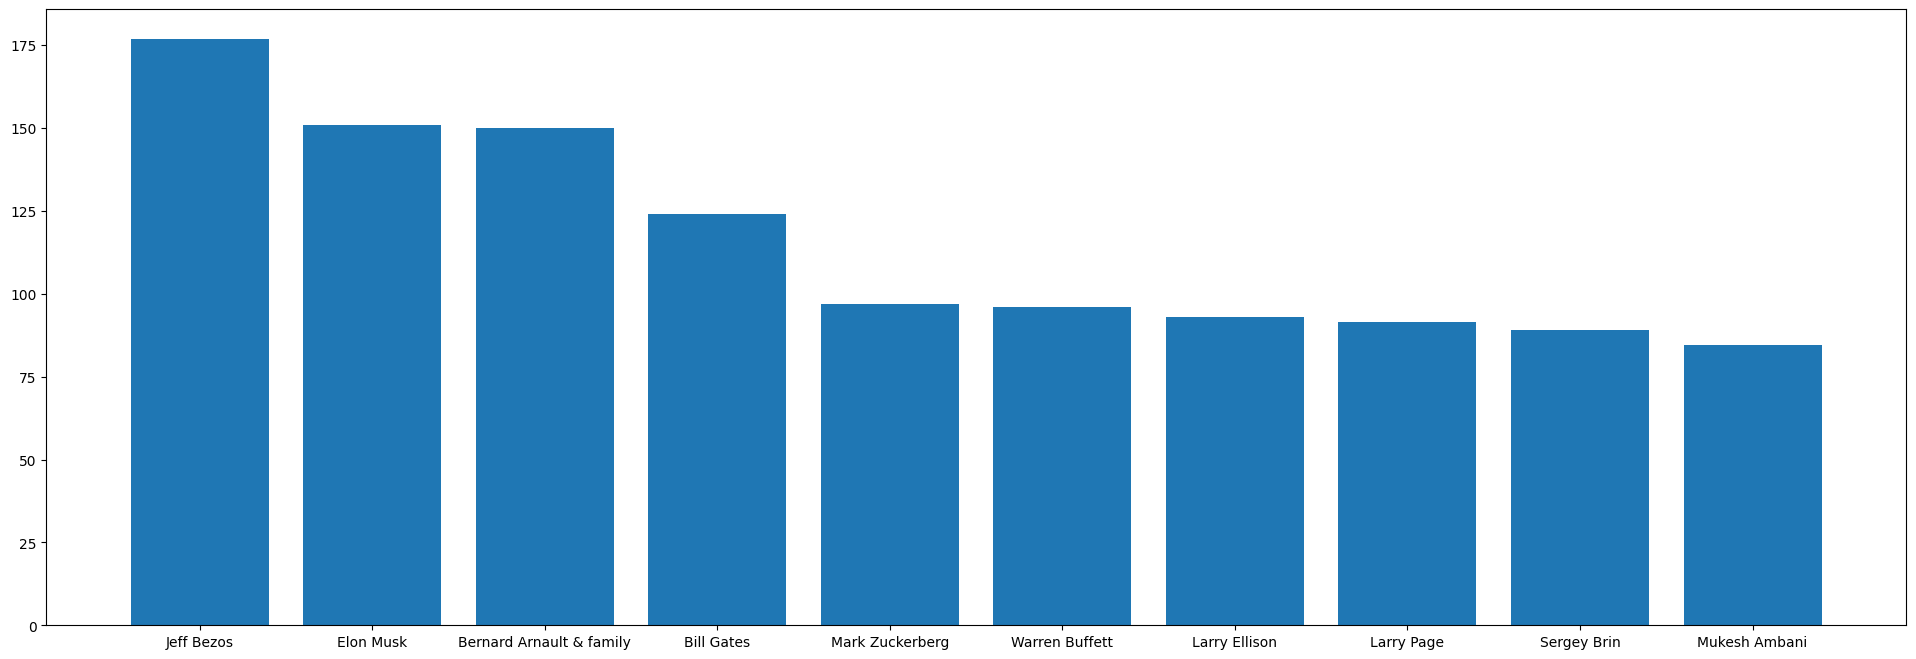

In [20]:
plt.figure(figsize=(24, 8))
plt.bar(df["Name"], df["NetWorth"])
plt.show()

In [21]:
df = data["Source"].value_counts().head(10).reset_index()
df

,Source,count
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


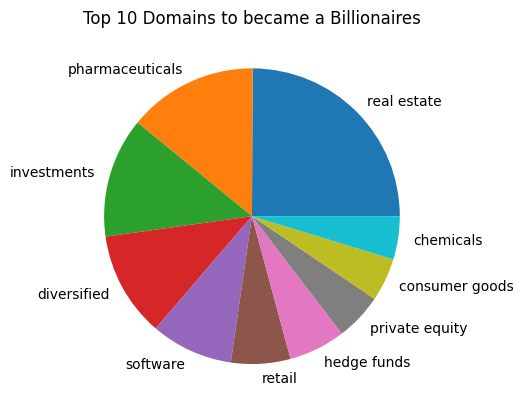

In [22]:
plt.pie(df["count"], labels=df["Source"])
plt.title("Top 10 Domains to became a Billionaires")
plt.show()

In [23]:
df = data["Industry"].value_counts().reset_index()
df

,Industry,count
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


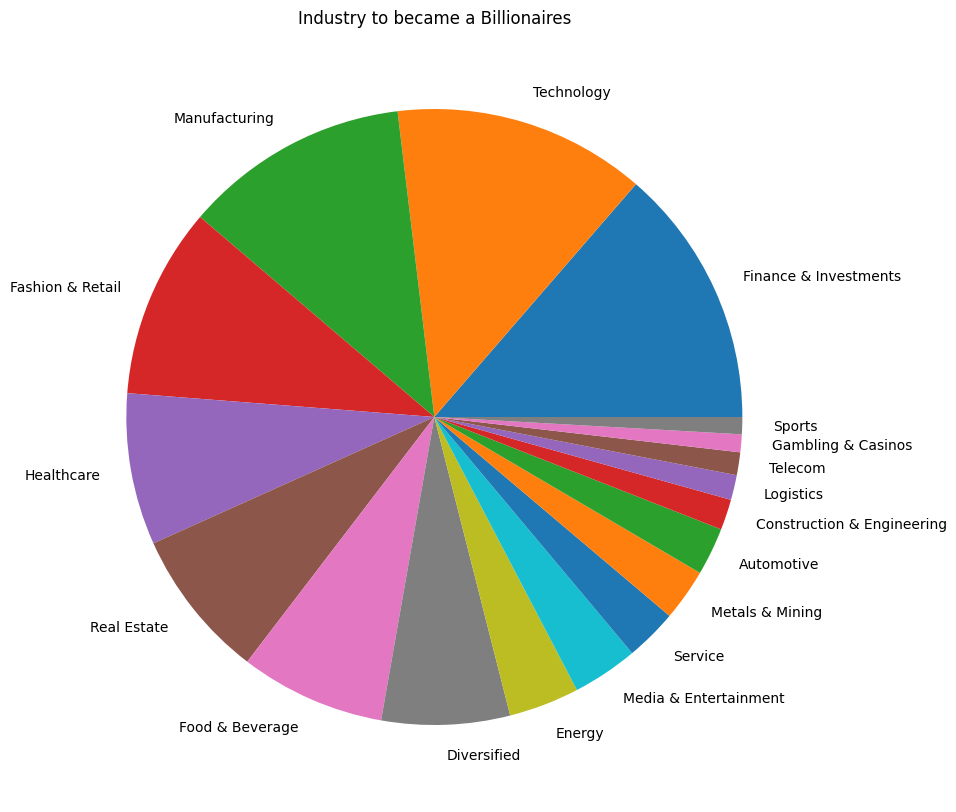

In [24]:
plt.figure(figsize=(24, 10))
plt.pie(df["count"], labels=df["Industry"])
plt.title("Industry to became a Billionaires")
plt.show()

In [25]:
df = data["Country"].value_counts().head().reset_index()
df

,Country,count
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115


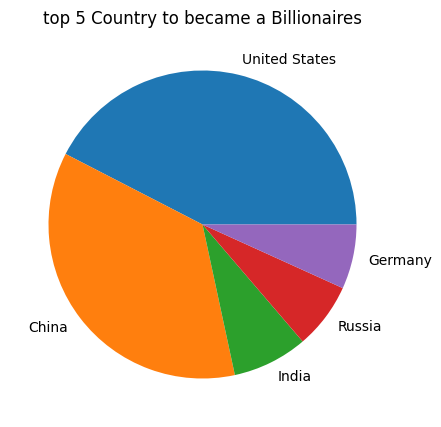

In [26]:
plt.figure(figsize=(15, 5))
plt.pie(df["count"], labels=df["Country"])
plt.title("top 5 Country to became a Billionaires")
plt.show()

Average and variance age of the richest people in the world

In [28]:
Average = data['Age'].mean()
Variance = data['Age'].var()

print(f'Average={Average} _ Variance={Variance}')



Average=63.1136023916293 _ Variance=180.7721364011008


The total NetWorth of each country

In [30]:
df = data.groupby(['Country'])['NetWorth'].sum().reset_index() 
df = data.sort_values(by= ["NetWorth"], ascending=True).reset_index()
df

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,2754,Zhou Wei family,1.0,China,Software,2674,54.0,Technology
1,2694,Hou Jianbin,1.0,China,education,2674,39.0,Service
2,2695,Hur Young-in,1.0,South Korea,"bakeries, fast food",2674,71.0,Food & Beverage
3,2696,Jiang Long,1.0,China,Manufacturing,2674,47.0,Technology
4,2697,Morris Kahn,1.0,Israel,software,2674,91.0,Technology
...,...,...,...,...,...,...,...,...
2671,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
2672,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
2673,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
2674,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive


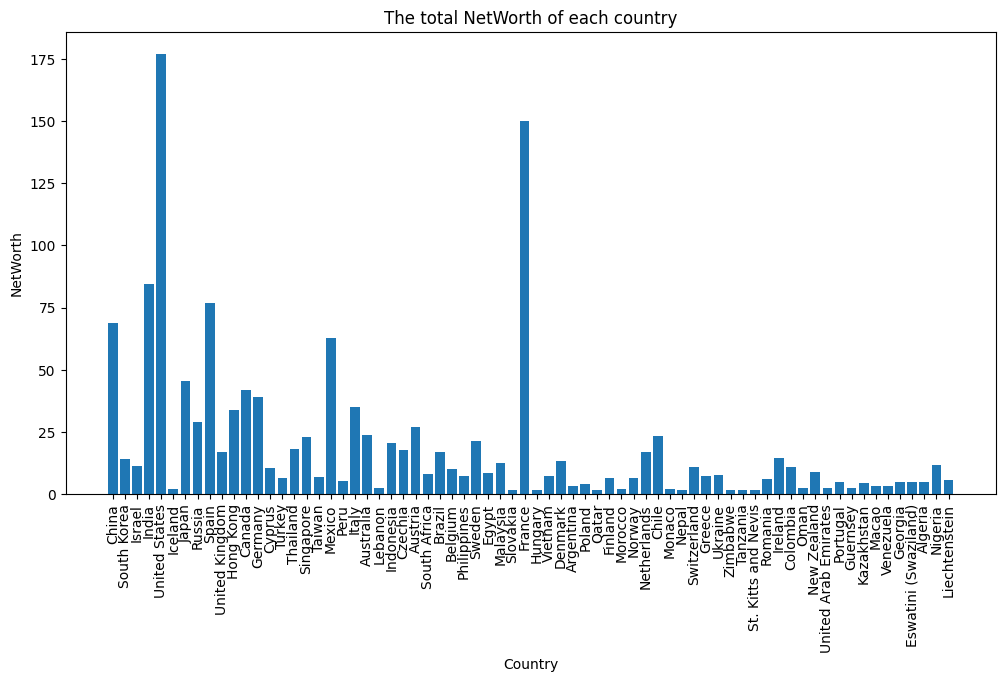

In [35]:
plt.figure(figsize=(12, 6))  
plt.title("The total NetWorth of each country")
plt.xlabel("Country")
plt.ylabel("NetWorth")
plt.bar(df['Country'].to_numpy(dtype=str), df['NetWorth'])  
plt.xticks(rotation=90)
plt.show()

The top 10 Richest Americans

In [41]:
df = data.query("Country=='United States'").reset_index(drop=True)
df = df.sort_values(by= ["NetWorth"], ascending=False).head(10).reset_index()
df

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,3,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,4,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
5,5,Larry Ellison,93.0,United States,software,7,76.0,Technology
6,6,Larry Page,91.5,United States,Google,8,48.0,Technology
7,7,Sergey Brin,89.0,United States,Google,9,47.0,Technology
8,8,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
9,9,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


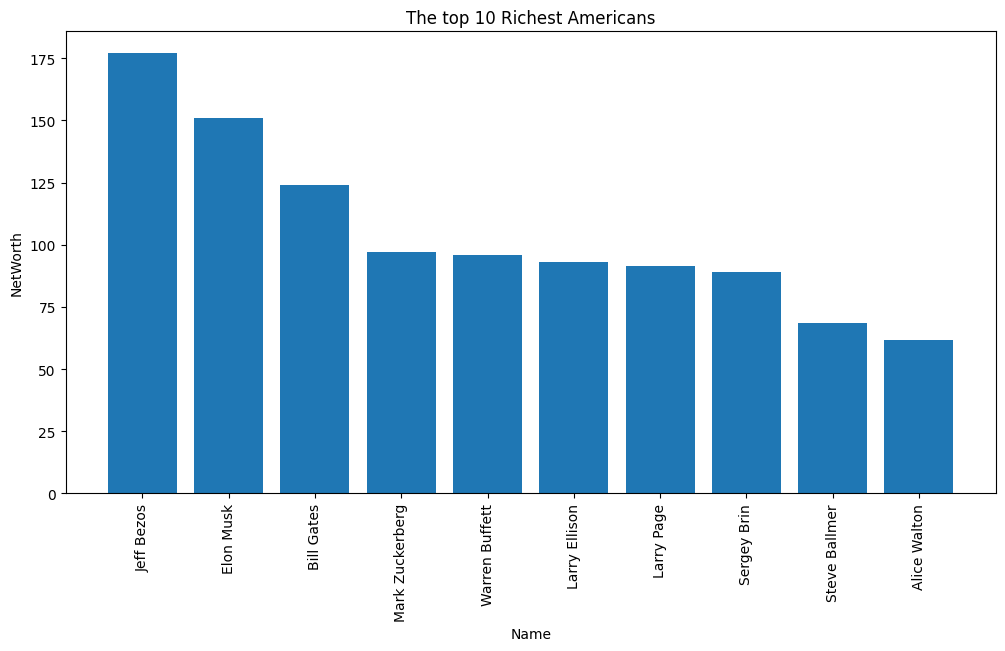

In [42]:
plt.figure(figsize=(12, 6))  
plt.title("The top 10 Richest Americans")
plt.xlabel("Name")
plt.ylabel("NetWorth")
plt.bar(df['Name'].to_numpy(dtype=str), df['NetWorth'])  
plt.xticks(rotation=90)
plt.show()

10 Countries with the lowest number of Rich

In [46]:
df = data["Country"].value_counts().reset_index()
df = df.sort_values(by= ["count"], ascending=True).head(10).reset_index()
df

,index,Country,count
0,69,Nepal,1
1,58,Zimbabwe,1
2,59,St. Kitts and Nevis,1
3,60,Tanzania,1
4,61,Guernsey,1
5,62,Oman,1
6,68,Liechtenstein,1
7,64,Macao,1
8,65,Venezuela,1
9,66,Eswatini (Swaziland),1


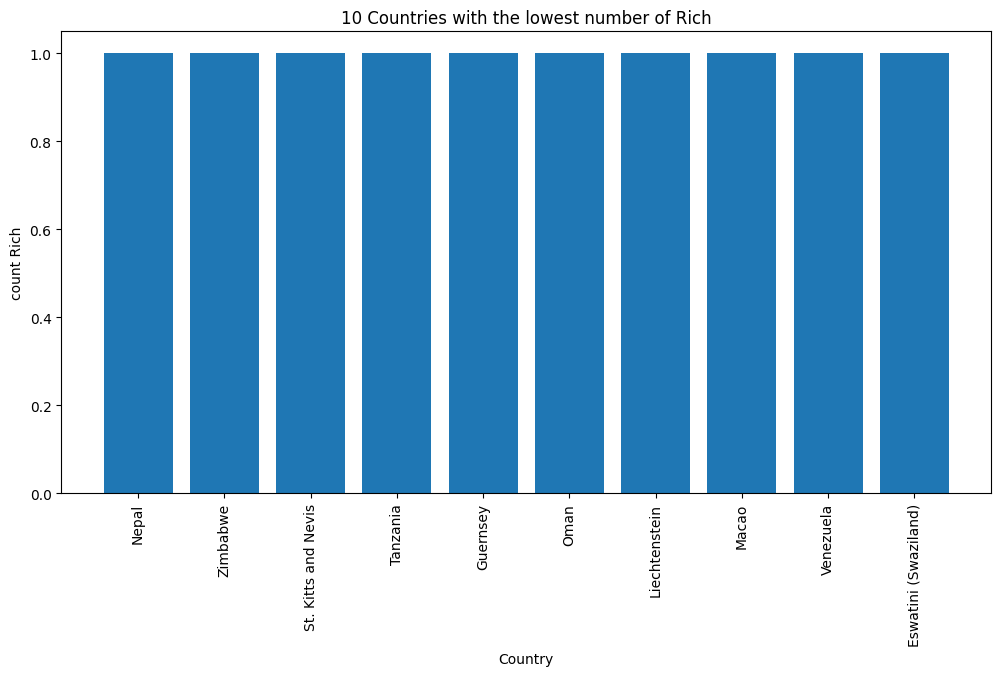

In [48]:
plt.figure(figsize=(12, 6))  
plt.title("10 Countries with the lowest number of Rich")
plt.xlabel("Country")
plt.ylabel("count Rich")
plt.bar(df['Country'].to_numpy(dtype=str), df['count'])  
plt.xticks(rotation=90)
plt.show()